In [1]:
#Importing packages
import numpy as np
import pandas as pd
import seaborn as sb
#import category_encoders as ce
import matplotlib.pyplot as plt
import pylab as pl
from pandas import ExcelFile
import xlrd
from sklearn import preprocessing

%matplotlib inline

In [2]:
#Openning Excel sheet and importing the data
"""
Open files and create the data frame from the excel sheet.
there are 24 columns and 142193 observations.
"""
#Assign spreadsheet file name to 'file'.
file = 'WeatherAUS-Draft.xlsx'

#Load spreadsheet.
Excel_File = pd.ExcelFile (file)
print "The file name is :", file
print "The sheet's name is:", "Data"

#Load a sheet into a dataframe by name Data:
Data = Excel_File.parse('Data')
print "The matrix size is:", np.shape (Data)
print "The file has:", np.size (Data), "data points."
print "*******************************************"
#Exploratory data analysis
print Data.shape
Data.head()
print Data.info()
print "*******************************************"
Data.head()

The file name is : WeatherAUS-Draft.xlsx
The sheet's name is: Data
The matrix size is: (142193, 14)
The file has: 1990702 data points.
*******************************************
(142193, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 14 columns):
label    142193 non-null int64
P1       142193 non-null float64
P2       142193 non-null float64
P3       142193 non-null float64
P4       142193 non-null float64
P5       142193 non-null float64
P6       142193 non-null float64
P7       142193 non-null float64
P8       142193 non-null float64
P9       142193 non-null float64
P10      142193 non-null float64
P11      142193 non-null float64
P12      142193 non-null float64
P13      142193 non-null int64
dtypes: float64(12), int64(2)
memory usage: 15.2 MB
None
*******************************************


,label,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13
0,-1,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,-1
1,-1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,-1
2,-1,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,-1
3,-1,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,-1
4,-1,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,-1


     P1    P2   P3    P4    P5    P6    P7    P8      P9     P10   P11   P12  \
0  13.4  22.9  0.6  44.0  20.0  24.0  71.0  22.0  1007.7  1007.1  16.9  21.8   
1   7.4  25.1  0.0  44.0   4.0  22.0  44.0  25.0  1010.6  1007.8  17.2  24.3   
2  12.9  25.7  0.0  46.0  19.0  26.0  38.0  30.0  1007.6  1008.7  21.0  23.2   
3   9.2  28.0  0.0  24.0  11.0   9.0  45.0  16.0  1017.6  1012.8  18.1  26.5   
4  17.5  32.3  1.0  41.0   7.0  20.0  82.0  33.0  1010.8  1006.0  17.8  29.7   

   P13  
0   -1  
1   -1  
2   -1  
3   -1  
4   -1  
0   -1
1   -1
2   -1
3   -1
4   -1
Name: label, dtype: int64


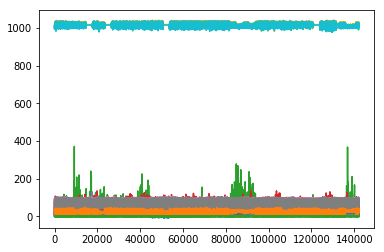

In [3]:
#Data
X = Data.drop('label', axis=1)  
y = Data['label']
print X.head()
print y.head()
#PLots
plt.plot(X) 
plt.show()

In [4]:
#Preprocessing: Scale
"""Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; 
they might behave badly if the individual features do not more or less look like standard normally distributed data:
Gaussian with zero mean and unit variance.
In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean
value of each feature, then scale it by dividing non-constant features by their standard deviation.
For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector
Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance 
in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective
function and make the estimator unable to learn from other features correctly as expected.
The function scale provides a quick and easy way to perform this operation on a single array-like dataset:"""

from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
print scaler  
X_scaled = scaler.fit_transform(X)
#X_new_scaled= scaler.transform(X_new)

X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']
X_scaled.head()

StandardScaler(copy=True, with_mean=True, with_std=True)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,0.189954,-0.045964,-0.207757,0.305648,0.677661,0.614850,0.113891,-1.435935,-1.475456,-1.220966,-0.013521,0.016412,-0.532962
1,-0.749174,0.263480,-0.278989,0.305648,-1.130034,0.385532,-1.312265,-1.289821,-1.045586,-1.116203,0.032832,0.380274,-0.532962
2,0.111694,0.347873,-0.278989,0.457874,0.564680,0.844167,-1.629188,-1.046299,-1.490279,-0.981508,0.619963,0.220175,-0.532962
3,-0.467436,0.671383,-0.278989,-1.216614,-0.339167,-1.105034,-1.259444,-1.728162,-0.007969,-0.367897,0.171889,0.700472,-0.532962
4,0.831692,1.276205,-0.160269,0.077309,-0.791091,0.156214,0.694918,-0.900186,-1.015940,-1.385593,0.125537,1.166215,-0.532962


In [5]:
#Divide data into training and test sets
from sklearn.model_selection import train_test_split

#P stands for Primary sets 
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_scaled, y, test_size = 0.20) 


In [6]:
X_train = X_train_p
X_test = X_test_p
y_train = y_train_p
y_test = y_test_p 

X_train = pd.DataFrame(X_train)
#Adding name for the columns
X_train.columns = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
                   'Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']
X_train = X_train.reset_index()
X_train = X_train.drop('index', axis=1)                            
print X_train.shape
print "Training data"
print X_train.head()

X_test = pd.DataFrame(X_test)
X_test.columns = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
                            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']
X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)                             
print X_test.shape
print "Test data"
print X_test.head()

(113754, 13)
Training data
    MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0  1.003866  1.571583 -0.278989      -0.379370      0.338718     -1.105034   
1 -0.326566 -0.847705  0.148403      -0.531596      1.129585      0.156214   
2 -1.015261 -0.932099 -0.255245      -2.206085     -1.581958     -1.105034   
3 -0.185697 -0.496064 -0.278989      -0.683822      0.903623     -0.187763   
4  0.549954  0.741711 -0.278989      -0.759936      0.564680     -0.875716   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  \
0    -2.791241    -2.020389    -0.067261    -0.068575  0.959882  1.675621   
1     0.536456     0.463540    -0.200669    -0.023677 -0.507947 -0.711311   
2     1.223124     0.366131     0.288493     0.410340 -1.125981 -0.754974   
3    -0.150212    -0.315732     1.889389     1.862053 -0.446144 -0.420221   
4    -1.523547    -1.435935     0.777656     0.530069  0.697217  0.875125   

   RainToday  
0  -0.532962  
1   1.87630

('Accuracy is: ', 0.83501529589648016)


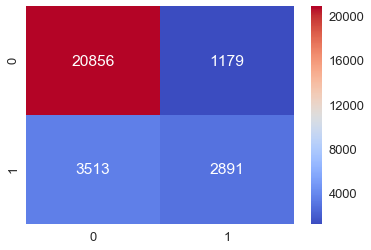

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

drop_list_final =['RainToday', 'Rainfall']
X_train_5 = X_train.drop(drop_list_final, axis = 1 )
X_test_5 = X_test.drop(drop_list_final, axis = 1 )

#random forest classifier with n_estimators=10 (default)
clf_rf_5 = RandomForestClassifier(random_state=43)      
clr_rf_5 = clf_rf_5.fit(X_train_5, y_train)

y_pred = clf_rf_5.predict(X_test_5)

ac = accuracy_score(y_test, clf_rf_5.predict(X_test_5))
print('Accuracy is: ',ac)

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
cm = confusion_matrix(y_test,clf_rf_5.predict(X_test_5))
sb.heatmap(cm, annot=True, cmap = 'coolwarm',fmt="d")

# Feature extraction

In [8]:
drop_list_final =['RainToday', 'Rainfall']
X_scaled_Reduced = X_scaled.drop(drop_list_final, axis = 1 )        # do not modify x, we will use it later 
X_scaled_Reduced.head()  

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.189954,-0.045964,0.305648,0.677661,0.614850,0.113891,-1.435935,-1.475456,-1.220966,-0.013521,0.016412
1,-0.749174,0.263480,0.305648,-1.130034,0.385532,-1.312265,-1.289821,-1.045586,-1.116203,0.032832,0.380274
2,0.111694,0.347873,0.457874,0.564680,0.844167,-1.629188,-1.046299,-1.490279,-0.981508,0.619963,0.220175
3,-0.467436,0.671383,-1.216614,-0.339167,-1.105034,-1.259444,-1.728162,-0.007969,-0.367897,0.171889,0.700472
4,0.831692,1.276205,0.077309,-0.791091,0.156214,0.694918,-0.900186,-1.015940,-1.385593,0.125537,1.166215


In [8]:
X_train_Reduced = X_train.drop(drop_list_final, axis = 1 )
X_test_Reduced = X_test.drop(drop_list_final, axis = 1 ) 

In [10]:
X_scaled_Reduced = X_scaled.drop(drop_list_final, axis = 1 ) 

Text(0,0.5,u'cumulative explained variance')

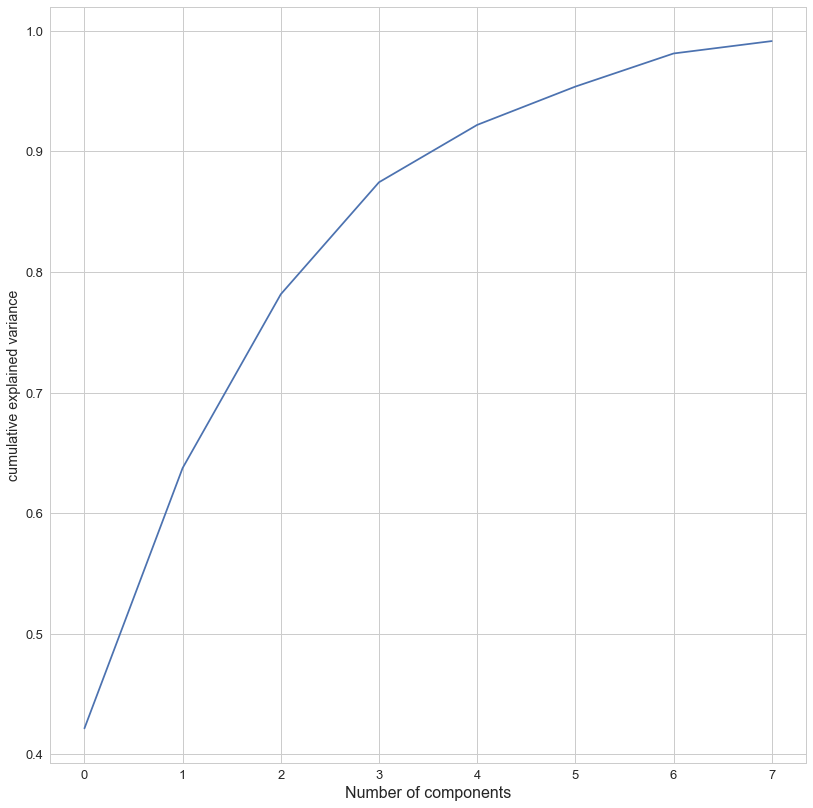

In [13]:
"""We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize 
data for better performance of PCA."""

from sklearn.decomposition import PCA
#pca = PCA()
#pca = PCA(n_components=2)

"""Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose 
the minimum number of principal components such that 95% of the variance is retained."""
pca = PCA(.99)

pca.fit(X_scaled_Reduced)

plt.figure(1, figsize=(15, 15))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components', fontsize = 16)
plt.ylabel('cumulative explained variance')

('Accuracy is: ', 0.83012764161890362)


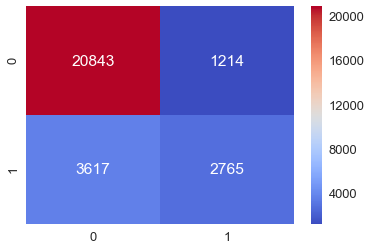

In [11]:
X_train_7 = pca.transform(X_train_Reduced)
X_test_7 = pca.transform(X_test_Reduced)


#random forest classifier with n_estimators=10 (default)
clf_rf_7 = RandomForestClassifier(random_state=43)      
clr_rf_7 = clf_rf_7.fit(X_train_7, y_train)

ac = accuracy_score(y_test, clf_rf_7.predict(X_test_7))
print ('Accuracy is: ',ac)

sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
cm = confusion_matrix(y_test,clf_rf_7.predict(X_test_7))
sb.heatmap(cm, annot=True, cmap = 'coolwarm',fmt="d")

('Accuracy:', 0.83483948099440908)
('Precision:', 0.71004736973323357)
('Recall:', 0.44625509244750861)
('F-Measure:', 0.54806119503511974)
('Geometric mean:', 0.65017335291284517)
*******************************************
                   pre       rec       spe        f1       geo       iba       sup

    class 0       0.86      0.95      0.45      0.90      0.78      0.62     22057
    class 1       0.71      0.45      0.95      0.55      0.78      0.60      6382

avg / total       0.82      0.83      0.56      0.82      0.78      0.61     28439

*******************************************


Text(31,0.5,u'True labels')

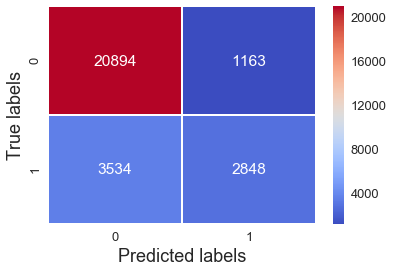

In [12]:
#Evaluation

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Model F-measure:Compute the F1 score, also known as balanced F-score or F-measure
F1 = 2 * (metrics.precision_score(y_test, y_pred) * metrics.recall_score
          (y_test, y_pred)) / (metrics.precision_score(y_test, y_pred) + metrics.recall_score(y_test, y_pred))
print ('F-Measure:', F1)

#Model G-mean
from imblearn.metrics import geometric_mean_score
print ('Geometric mean:', geometric_mean_score(y_test, y_pred))
print "*******************************************"

#Evaluating the results
"""Confusion matrix, precision, recall, and F1 measures 
are the most commonly used metrics for classification tasks"""
from imblearn.metrics import classification_report_imbalanced
target_names = ['class 0', 'class 1']
print(classification_report_imbalanced(y_test, y_pred,     target_names=target_names))

print "*******************************************"
#Confusion matrix using pyplot 
cm = confusion_matrix(y_test, y_pred)
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
ax= plt.subplot()
sb.heatmap(cm, annot=True, ax = ax, cmap='coolwarm',fmt='g',linewidths=0.5 ) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=18);ax.set_ylabel('True labels', fontsize=18)
#ax.set_title('Classifier with Linear kernel', fontsize=20)
#ax.xaxis.set_ticklabels(['Versicolor', 'Setosa']); ax.yaxis.set_ticklabels(['Versicolor', 'Setosa'])
#plt.savefig('Iris-Scaled-linear.png')

In [13]:
X_train_7 = pd.DataFrame(X_train_7) 
X_train_7.head()

,0,1,2,3,4,5,6,7
0,-0.221183,-0.309609,1.614533,0.415234,0.056403,-1.116533,0.116186,-0.122676
1,-1.391759,-0.789091,0.662521,1.234883,-0.293865,-0.333418,0.058116,-0.116719
2,5.071710,-0.630189,-1.183748,1.586683,-0.058910,0.609968,0.185906,-0.189458
3,-0.799737,-0.430740,-0.072403,0.947307,-0.880392,-0.934609,-0.362296,0.032611
4,-5.086211,-1.774453,1.015426,-1.126787,-0.620693,0.438790,0.229631,0.242919


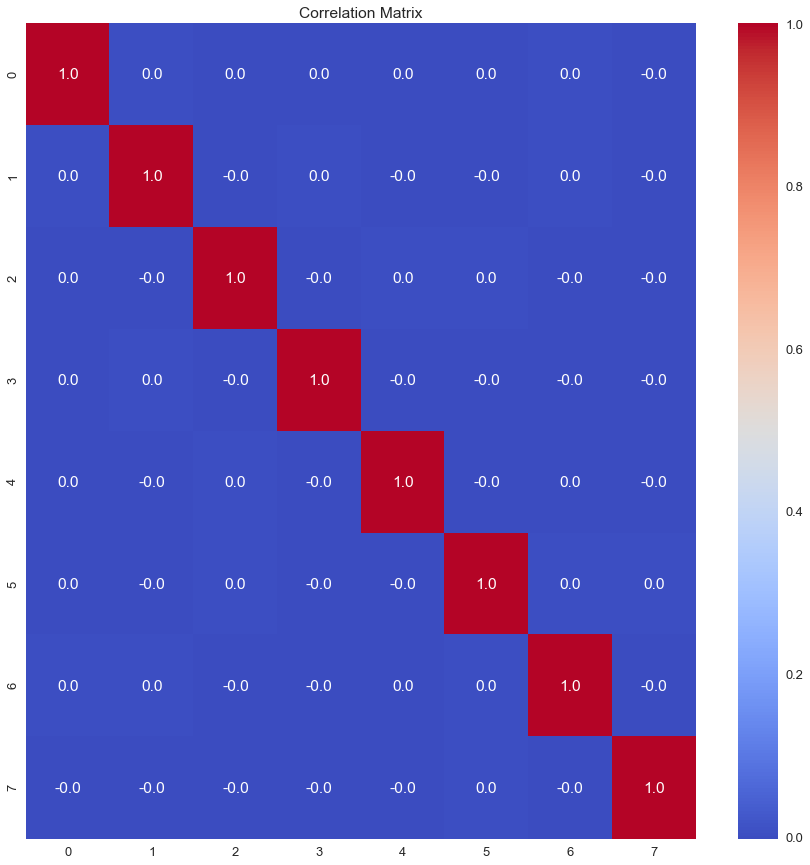

In [14]:
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
plot = sb.heatmap(X_train_7.corr(), annot=True, fmt='.001f', cmap= 'coolwarm')

In [15]:
X_scaled_Reduced_2 = pca.transform(X_scaled_Reduced)
X_scaled_Reduced_2 = pd.DataFrame(X_scaled_Reduced_2)
X_scaled_Reduced_2.head()

,0,1,2,3,4,5,6,7
0,1.329162,1.089773,0.154372,1.386960,-0.077080,0.717266,0.698151,-0.844924
1,1.201544,-0.165625,0.510448,2.212495,-0.873853,-0.776803,0.007917,0.085203
2,2.188099,0.833814,0.844096,1.261486,0.215900,-0.702896,0.469526,-0.209797
3,0.827603,-2.096686,0.795512,1.560439,0.562138,0.032131,0.468624,0.029683
4,1.975079,-0.412035,-1.132834,0.913044,-1.073298,0.954810,0.153818,-0.279111


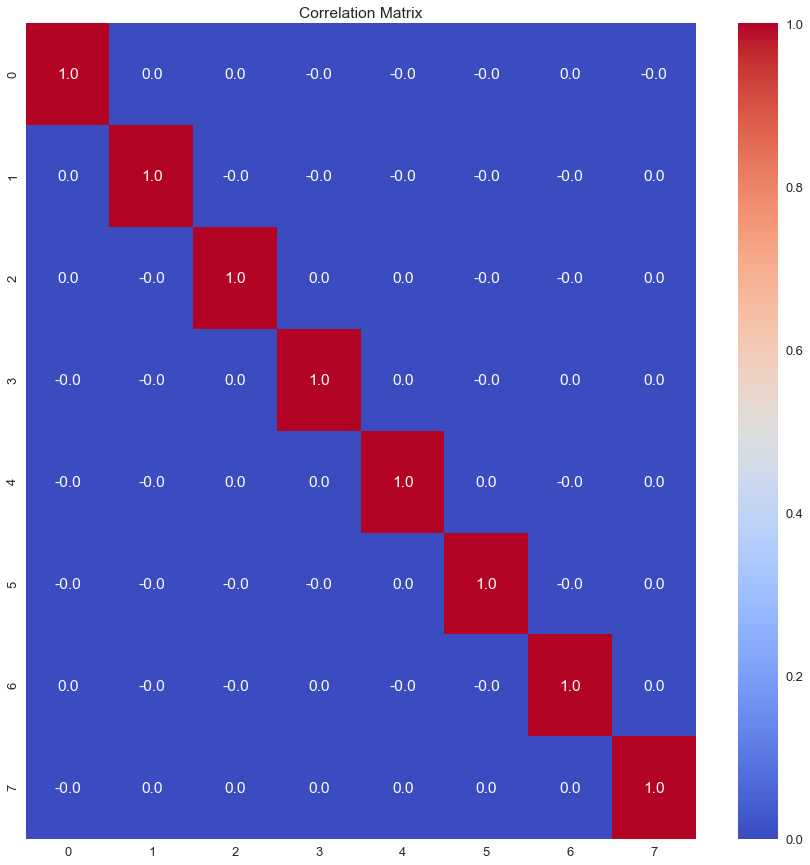

In [16]:
sb.set(style="whitegrid",font='sans-serif', font_scale=1.3)
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix')
plot = sb.heatmap(X_scaled_Reduced_2.corr(), annot=True,fmt='.001f', cmap= 'coolwarm')